<a href="https://colab.research.google.com/github/aayushjha/Qrcode-using-zbarWin/blob/master/germantrafficsignclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://njnitesh@bitbucket.org/njnitesh/traffic_sign_classifier_data.git

Cloning into 'traffic_sign_classifier_data'...
remote: Counting objects: 8, done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0)
Unpacking objects: 100% (8/8), done.


In [0]:
basedir="/content/traffic_sign_classifier_data/"

In [0]:
import pickle
with open(basedir+"train.p","rb") as f:
  train=pickle.loads(f.read())

with open(basedir+"test.p","rb") as f:
  test=pickle.loads(f.read())

with open(basedir+"valid.p","rb") as f:
  valid=pickle.loads(f.read())
import pandas as pd
info=pd.read_csv("/content/traffic_sign_classifier_data/signnames.csv")
info.tail()

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
train["labels"]

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
images=train["features"]

In [0]:
labels=train["labels"]

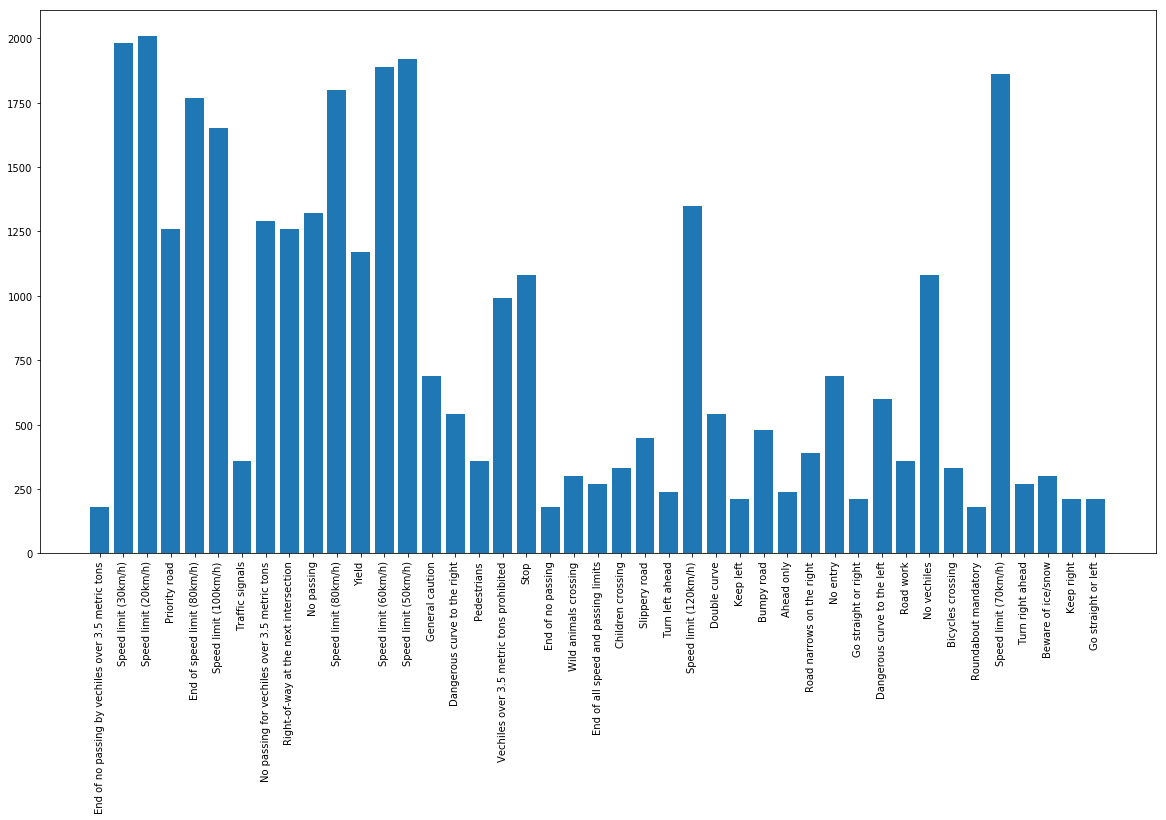

In [0]:
import matplotlib.pyplot as plt
images.shape
d=pd.Series(labels).value_counts()
lab=d.index
val=d.values
plt.figure(figsize=(20,10))
plt.bar(lab,val)
plt.xticks(d.index,info.SignName.values,rotation=90)
plt.show()

In [0]:
import cv2 as cv
def preProcessingOfImages(image):
  gray=cv.cvtColor(image,cv.COLOR_RGB2GRAY)
  gray=cv.equalizeHist(gray)
  gray=gray/255
  return gray

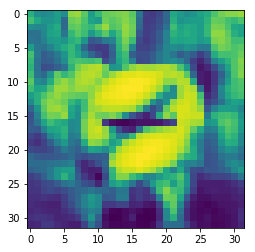

In [0]:
plt.imshow(preProcessingOfImages(images[90]))

In [0]:
convertedImages=list(map(preProcessingOfImages,images))
import numpy as np

In [0]:
convertedImages=np.array(convertedImages)

In [0]:
convertedImages.shape

(34799, 32, 32)

In [0]:
finalConImages=convertedImages.reshape(-1,32,32,1)

In [0]:
# gray scale 32,32,1
#equailise histogram (eqaulize the hist)
#downscale(divide by 255)

#change the labels data in to categorical
import numpy as np
import matplotlib.pyplot as plt
# import keras


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten          
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
finalLabels=to_categorical(labels,43)

In [0]:
finalLabels.shape

(34799, 43)

In [0]:




# import matplotlib.pyplot as plt
# plt.imshow(images[0])

In [0]:
# import cv2 as cv
# gray=cv.cvtColor(images[60],cv.COLOR_RGB2GRAY)
# dt=cv.equalizeHist(gray)
# dt=dt/255
# print(images[60].shape)
# # plt.imshow(dt,cmap="gray")

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(32,32,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(43,activation="softmax"))
  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
  return model

In [0]:
lenet=le_net()

W0713 13:19:29.266366 140359360427904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 13:19:29.309613 140359360427904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 13:19:29.317341 140359360427904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 13:19:29.346189 140359360427904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 13:19:29.387914 140359360427904 deprecation_wrapp

In [0]:
history=lenet.fit(finalConImages,finalLabels,epochs=50,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

W0713 13:19:30.031874 140359360427904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 31319 samples, validate on 3480 samples
Epoch 1/50
31319/31319 [==============================] - 7s 237us/step - loss: 2.8449 - acc: 0.2572 - val_loss: 8.5650 - val_acc: 0.0322
Epoch 2/50
31319/31319 [==============================] - 1s 26us/step - loss: 1.2489 - acc: 0.6336 - val_loss: 12.1604 - val_acc: 0.0342
Epoch 3/50
31319/31319 [==============================] - 1s 24us/step - loss: 0.7406 - acc: 0.7760 - val_loss: 13.7514 - val_acc: 0.0342
Epoch 4/50
31319/31319 [==============================] - 1s 24us/step - loss: 0.5367 - acc: 0.8339 - val_loss: 14.1918 - val_acc: 0.0342
Epoch 5/50
31319/31319 [==============================] - 1s 24us/step - loss: 0.4164 - acc: 0.8710 - val_loss: 14.6077 - val_acc: 0.0342
Epoch 6/50
31319/31319 [==============================] - 1s 24us/step - loss: 0.3486 - acc: 0.8921 - val_loss: 14.8943 - val_acc: 0.0342
Epoch 7/50
31319/31319 [==============================] - 1s 24us/step - loss: 0.2956 - acc: 0.9092 - val_loss: 14.8801 - v